# Tarea 5 Proyecto Análisis de Datos
## Danilo Manquillo López

### 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc


In [79]:
#Cargar las librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
import plotly.graph_objs as go # Creación de gráficos en tres dimensiones
import plotly.express as px # Creación de gráficos en tres dimensiones
%matplotlib inline
# librerías de para implementar modelo Kmeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# librerías de para evaluar el modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score



from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix



In [2]:
Datos = pd.read_csv('./Titanic-Dataset.csv')
Datos.head(40)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
Datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['SibSp'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

In [9]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [11]:
print("Cantidad de Registros con cero en PassengerId: ",Datos['PassengerId'].isin([0]).sum())
print("Cantidad de Registros con cero en Survived: ",Datos['Survived'].isin([0]).sum())
print("Cantidad de Registros con cero en Pclass: ",Datos['Pclass'].isin([0]).sum())
print("Cantidad de Registros con cero en Age: ",Datos['Age'].isin([0]).sum())
print("Cantidad de Registros con cero en SibSp: ",Datos['SibSp'].isin([0]).sum())
print("Cantidad de Registros con cero en Parch: ",Datos['Parch'].isin([0]).sum())
print("Cantidad de Registros con cero en Fare: ",Datos['Fare'].isin([0]).sum())

Cantidad de Registros con cero en PassengerId:  0
Cantidad de Registros con cero en Survived:  549
Cantidad de Registros con cero en Pclass:  0
Cantidad de Registros con cero en Age:  0
Cantidad de Registros con cero en SibSp:  608
Cantidad de Registros con cero en Parch:  678
Cantidad de Registros con cero en Fare:  15


In [13]:
# VALORES FALTANTES
valores_vacios_totales = Datos['Age'].isna().sum().sum()
print("\nvacios:", valores_vacios_totales)


vacios: 177


In [15]:
# agregar los valores faltande de edad por la media
Datos['Age'] = Datos['Age'].fillna(Datos['Age'].mean())

In [17]:
# verificar que no hayan quedado valores faltantes en la edad
valores_vacios_totales = Datos['Age'].isna().sum().sum()
print("\nNúmero total de valores vacíos:", valores_vacios_totales)


Número total de valores vacíos: 0


In [19]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Age'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Atípicos')

In [21]:
#convertir valores de texto a numeros si es hombre 1 si es mujer cero
Datos['Sex'] = Datos['Sex'].replace({'male': 1, 'female': 0})

In [23]:
Datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


### 3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

#### para este modelo vamos a utilizar las caracteristicas: EDAD, GENERO, CLASE, Y SI SOBREVIVIO O NO

In [25]:
# Filtrar columnas

Datos = Datos[["Survived","Pclass","Sex","Age"]]
Datos.head(10)

,Survived,Pclass,Sex,Age
0,0,3,1,22.000000
1,1,1,0,38.000000
2,1,3,0,26.000000
3,1,1,0,35.000000
4,0,3,1,35.000000
5,0,3,1,29.699118
6,0,1,1,54.000000
7,0,3,1,2.000000
8,1,3,0,27.000000
9,1,2,0,14.000000


In [27]:
# Total de personas sobrevivientes
Datos['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

### 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.

In [29]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = Datos.drop('Survived',axis=1) # Se cargan los datos de train sin los datos de la columna Diabetico 
Y = Datos['Survived'] # Se cargan los datos de train con los datos de la la columna Diabetico

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [69]:
print (X_train)

     Pclass  Sex        Age
671       1    1  31.000000
417       2    0  18.000000
634       3    0   9.000000
323       2    0  22.000000
379       3    1  19.000000
..      ...  ...        ...
131       3    1  20.000000
490       3    1  29.699118
528       3    1  39.000000
48        3    1  29.699118
80        3    1  22.000000

[668 rows x 3 columns]


In [31]:
print (Y_train)

671    0
417    1
634    0
323    1
379    0
      ..
131    0
490    0
528    0
48     0
80     0
Name: Survived, Length: 668, dtype: int64


### 5. Entrenar el modelo configurando los diferentes hiperparámetros.

In [33]:
# Construir el modelo de regresión logística 

modelo_regresion = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación

In [75]:
print (Y_test)

288    1
869    1
182    0
684    0
599    1
      ..
882    0
434    0
304    0
500    0
633    0
Name: Survived, Length: 223, dtype: int64


In [35]:
print (Prediccion)

[0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1 1 0 1
 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0
 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0
 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0
 0 1 1 0 0 0 0 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 0]


### 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc

In [37]:
print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       137
           1       0.77      0.66      0.71        86

    accuracy                           0.79       223
   macro avg       0.79      0.77      0.78       223
weighted avg       0.79      0.79      0.79       223



In [115]:
# Desempeño del modelo con el Coeficiente de Silhouette el Índice de Calinski-Harabasz y el índice de Davies Bouldin Score

# Preparación de la metrica de la columna Grupo
Observaciones = len(Datos)
X = Datos.drop('Survived', axis=1)
clusters = Datos['Survived']

# Se calculan las métricas
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# Se crea una tabla para mostrar los valores de las métricas
table_data = [
    ["Numero de Observaciones", Observaciones],
    ["Coeficiente Silhouette", sil_score],
    ["Indice Calinski Harabasz", calinski_score],
    ["Indice Davies Bouldin", davies_score]
]

# Imprime la tabla
from tabulate import tabulate
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+--------------------------+----------------------+
|          Metric          |        Value         |
+--------------------------+----------------------+
| Numero de Observaciones  |         891          |
|  Coeficiente Silhouette  | 0.028879786044860335 |
| Indice Calinski Harabasz |  5.109490685366067   |
|  Indice Davies Bouldin   |  9.435563802731638   |
+--------------------------+----------------------+


### 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

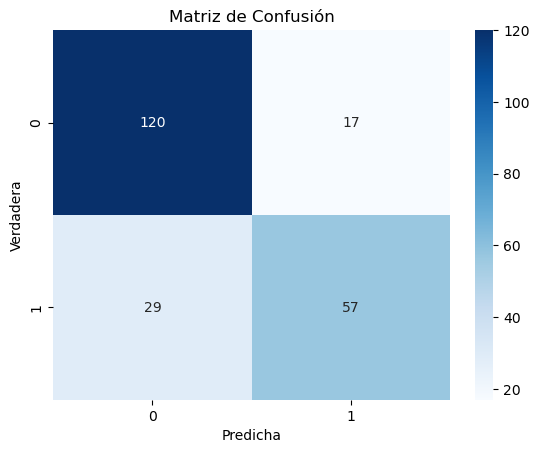

In [123]:
#Matrix de Confusión del modelo

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1"], yticklabels=["0", "1"])

plt.title("Matriz de Confusión")
plt.ylabel('Verdadera')
plt.xlabel('Predicha')
plt.show()

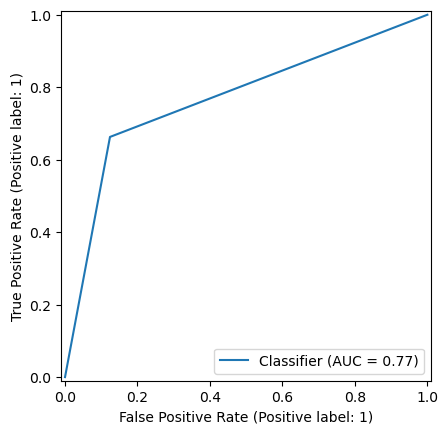

In [99]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()

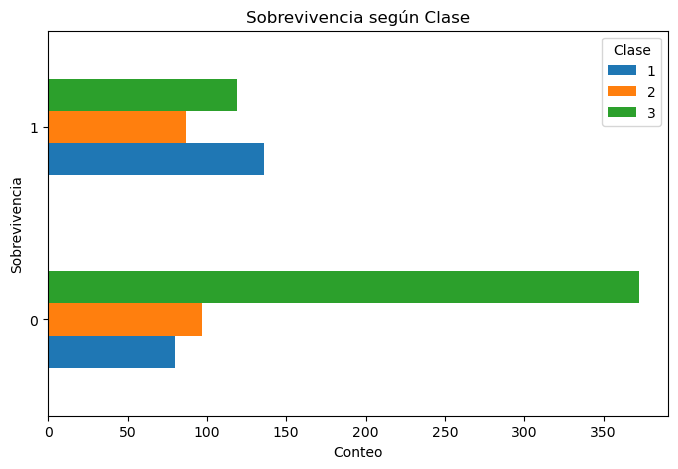

In [109]:
conteos = Datos.groupby(['Survived', 'Pclass']).size().unstack()
conteos.plot(kind='barh', stacked=False, figsize=(8, 5))
plt.title("Sobrevivencia según Clase")
plt.xlabel("Conteo")
plt.ylabel("Sobrevivencia")
plt.legend(title="Clase")
plt.show()

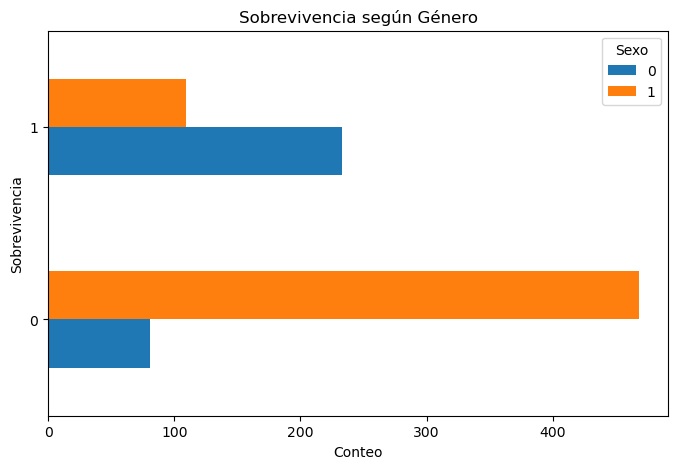

In [107]:
conteos = Datos.groupby(['Survived', 'Sex']).size().unstack()
conteos.plot(kind='barh', stacked=False, figsize=(8, 5))
plt.title("Sobrevivencia según Género")
plt.xlabel("Conteo")
plt.ylabel("Sobrevivencia")
plt.legend(title="Sexo")
plt.show()
